# Рекомендация тарифов

В вашем распоряжении данные о поведении клиентов, которые уже перешли на эти тарифы (из проекта курса «Статистический анализ данных»). Нужно построить модель для задачи классификации, которая выберет подходящий тариф. Предобработка данных не понадобится — вы её уже сделали.

Постройте модель с максимально большим значением *accuracy*. Чтобы сдать проект успешно, нужно довести долю правильных ответов по крайней мере до 0.75. Проверьте *accuracy* на тестовой выборке самостоятельно.

## Откройте и изучите файл

In [1]:
import pandas as pd
from joblib import dump
from sklearn.model_selection import train_test_split 
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import seaborn as sns

Подключил библиотеки.

In [2]:
data = pd.read_csv('/datasets/users_behavior.csv')

Загрузил файл с базой данных и сохранил ее в переменную data

In [3]:
print(data.shape)

(3214, 5)


Просмотрел информацию о количестве наблюдений и признаков, вижу, что в таблице 3214 строк и 5 столбцов.

In [4]:
print(data.columns)

Index(['calls', 'minutes', 'messages', 'mb_used', 'is_ultra'], dtype='object')


Вывел названия столбцов.

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3214 entries, 0 to 3213
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   calls     3214 non-null   float64
 1   minutes   3214 non-null   float64
 2   messages  3214 non-null   float64
 3   mb_used   3214 non-null   float64
 4   is_ultra  3214 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 125.7 KB


Просмотрел общую информацию по датафрейму и всем признакам.

In [6]:
data.duplicated().sum()

0

Убедился в отсутствии дубликатов.

In [7]:
data['is_ultra'].value_counts()

0    2229
1     985
Name: is_ultra, dtype: int64

Проверил какое количество пользователей пользовались каким тарифом:  
**Ультра** - 985;  
**Смарт** - 2229.

Корреляция 0.9820832355742293


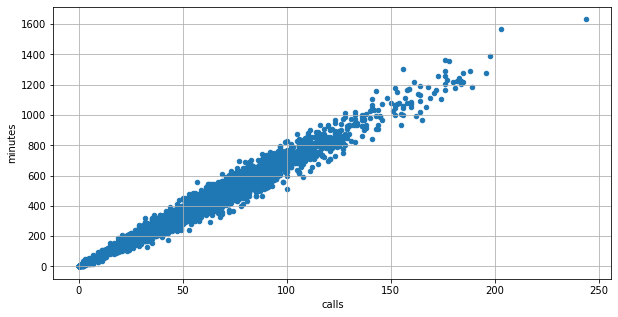

In [8]:
data.plot(x='calls', y='minutes', kind='scatter', grid=True, figsize=(10, 5));
print('Корреляция', data['calls'].corr(data['minutes']))

Построил график корреляции и рассчитал величину

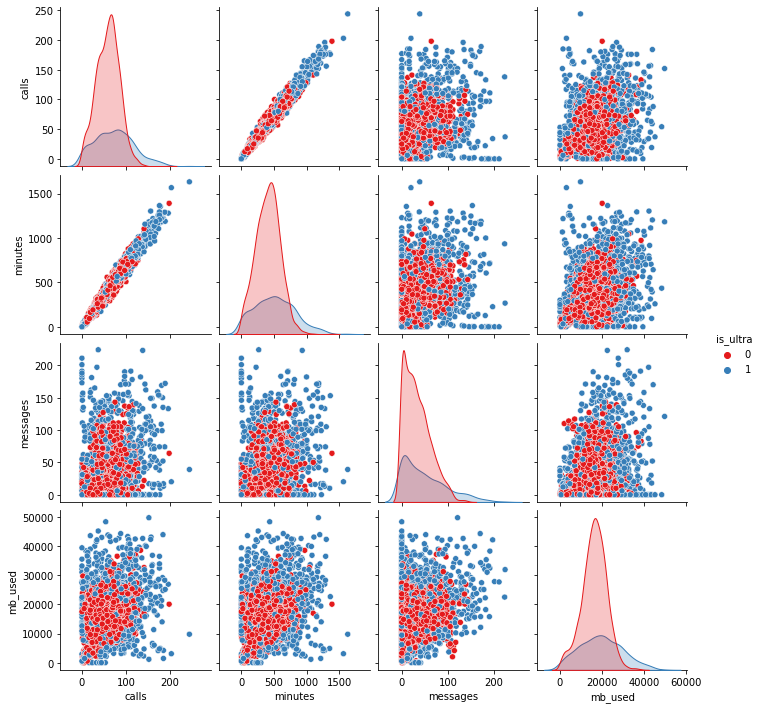

In [9]:
sns.pairplot(data, hue='is_ultra', palette='Set1');

Высокая корреляция (мультиколлениарность) может привести к нестабильной работе моделей машинного обучения: наличие «лишних» признаков ведёт к переобучению или вовсе ломает модель.

## Разбейте данные на выборки

In [10]:
train, test = train_test_split(data, test_size=0.2, random_state=12345)

Разделил DS на обучающую и тестовую выборку в пропорции 80/20%.

In [11]:
print('Train - 80%', train.shape)
print('Test - 20%', test.shape)

Train - 80% (2571, 5)
Test - 20% (643, 5)


Проверил количество наблюдений в каждой выборке.

In [12]:
train, valid = train_test_split(train, test_size=0.25, random_state=12345)

Разделил обучающую выборку на обучающую и валидационную выборки в пропорции 80/20%

In [13]:
print('Train - 60%', train.shape)
print('Valid - 20%', valid.shape)
print('Test - 20%', test.shape)

Train - 60% (1928, 5)
Valid - 20% (643, 5)
Test - 20% (643, 5)


Проверил количество наблюдений в каждой выборке.

In [14]:
features_train = train.drop(['is_ultra'], axis=1) #выделил признак для обучающей выборки
target_train = train['is_ultra'] #выделил целевой признак для обучающей выборки

Выделил признаки для **train**

In [15]:
print('Features_train', features_train.shape)
print('Target_train', target_train.shape)

Features_train (1928, 4)
Target_train (1928,)


In [16]:
features_valid = valid.drop(['is_ultra'], axis=1) #выделил признак для валидационной выборки
target_valid = valid['is_ultra'] #выделил целевой признак для валидационной выборки

Выделил признаки для **valid**

In [17]:
print('Features_valid', features_valid.shape)
print('Target_valid', target_valid.shape)

Features_valid (643, 4)
Target_valid (643,)


In [18]:
features_test = test.drop(['is_ultra'], axis=1) #выделил признак для тестовой выборки
target_test = test['is_ultra'] #выделил целевой признак для тестовой выборки

Выделил признаки для **test**

In [19]:
print('Features_test', features_test.shape)
print('Target_test', target_test.shape)

Features_test (643, 4)
Target_test (643,)


## Исследуйте модели

#### Дерево решений

In [20]:
model = DecisionTreeClassifier() # исследую модель дерево решений
model.fit(features_train, target_train) # обучил модель на обучающей выборке
predictions_valid = model.predict(features_valid) # нашел предсказания на валидационной выборке
print('Accuracy', accuracy_score(target_valid, predictions_valid)) 

Accuracy 0.7216174183514774


Модель без гиперпараметров, значение Accuracy = 0.73.

In [21]:
model = DecisionTreeClassifier(max_depth=1, random_state=12345) # исследую модель дерево решений
model.fit(features_train, target_train) # обучил модель на обучающей выборке
predictions_valid = model.predict(features_valid) # нашел предсказания на валидационной выборке
print('Accuracy', accuracy_score(target_valid, predictions_valid)) 

Accuracy 0.7387247278382582


Изменил глубину дерева на 1, значение Accuracy изменилось = 0.76.

In [22]:
model = DecisionTreeClassifier(max_depth=5, random_state=12345) # исследую модель дерево решений
model.fit(features_train, target_train) # обучил модель на обучающей выборке
predictions_valid = model.predict(features_valid) # нашел предсказания на валидационной выборке
print('Accuracy', accuracy_score(target_valid, predictions_valid)) 

Accuracy 0.7589424572317263


Изменил глубину дерева на 5, значение Accuracy увеличилось = 0.78.

In [23]:
model = DecisionTreeClassifier(max_depth=10) # исследую модель дерево решений
model.fit(features_train, target_train) # обучил модель на обучающей выборке
predictions_valid = model.predict(features_valid) # нашел предсказания на валидационной выборке
print('Accuracy', accuracy_score(target_valid, predictions_valid)) 

Accuracy 0.7744945567651633


Экспериментально подобрал глубину дерева на 10, значение Accuracy изменилось = 0.77.

**Вывод** - максимальное значение Accuracy было 0.78 с использованием значения гиперпараметра глубина дерева равное 5.  

#### Случайный лес

In [24]:
model = RandomForestClassifier() # исследую модель случайный лес
model.fit(features_train, target_train) # обучил модель на обучающей выборке
predictions_valid = model.predict(features_valid) # нашел предсказания на валидационной выборке
print('Accuracy', accuracy_score(target_valid, predictions_valid)) 

Accuracy 0.7931570762052877


Модель без гиперпараметров, значение Accuracy = 0.80.

In [25]:
model = RandomForestClassifier(n_estimators=6, random_state=12345) # исследую модель случайный лес
model.fit(features_train, target_train) # обучил модель на обучающей выборке
predictions_valid = model.predict(features_valid) # нашел предсказания на валидационной выборке
print('Accuracy', accuracy_score(target_valid, predictions_valid)) 

Accuracy 0.7698289269051322


Экспериментально подобрал количество деревьев на 6, значение Accuracy уменьшилось = 0.79.

In [26]:
model = RandomForestClassifier(n_estimators=200, random_state=12345) # исследую модель случайный лес
model.fit(features_train, target_train) # обучил модель на обучающей выборке
predictions_valid = model.predict(features_valid) # нашел предсказания на валидационной выборке
print('Accuracy', accuracy_score(target_valid, predictions_valid)) 

Accuracy 0.7962674961119751


Экспериментально подобрал количество деревьев на 200, значение Accuracy увеличилось = 0.81.

In [27]:
model = RandomForestClassifier(n_estimators=500, random_state=12345) # исследую модель случайный лес
model.fit(features_train, target_train) # обучил модель на обучающей выборке
predictions_valid = model.predict(features_valid) # нашел предсказания на валидационной выборке
print('Accuracy', accuracy_score(target_valid, predictions_valid)) 

Accuracy 0.7931570762052877


Экспериментально подобрал количество деревьев на 500, значение Accuracy увеличилось = 0.81.

In [28]:
model = RandomForestClassifier(n_estimators=1000, random_state=12345) # исследую модель случайный лес
model.fit(features_train, target_train) # обучил модель на обучающей выборке
predictions_valid = model.predict(features_valid) # нашел предсказания на валидационной выборке
print('Accuracy', accuracy_score(target_valid, predictions_valid)) 

Accuracy 0.7962674961119751


Экспериментально подобрал количество деревьев на 500, значение Accuracy уменьшилось = 0.81.

**Вывод** - максимальное значение Accuracy было 0.815 с использованием гиперпараметра n_estimators=200.  
При увеличении количества корзин (например до 500 - 1000) заметно увеличивается время обучения модели.

#### Логистическая регрессия

In [29]:
model = LogisticRegression() # исследую модель логистическая регрессия
model.fit(features_train, target_train) # обучил модель на обучающей выборке
predictions_valid = model.predict(features_valid) # нашел предсказания на валидационной выборке
print('Accuracy', accuracy_score(target_valid, predictions_valid)) 

Accuracy 0.7262830482115086


Модель без гиперпараметров, значение Accuracy = 0.7.

In [30]:
model = LogisticRegression(max_iter=100) # исследую модель логистическая регрессия
model.fit(features_train, target_train) # обучил модель на обучающей выборке
predictions_valid = model.predict(features_valid) # нашел предсказания на валидационной выборке
print('Accuracy', accuracy_score(target_valid, predictions_valid)) 

Accuracy 0.7262830482115086


Изменение гиперпараметра **max_iter** не приводит к изменению значения Accuracy.

In [31]:
model = LogisticRegression(random_state=345) # исследую модель логистическая регрессия
model.fit(features_train, target_train) # обучил модель на обучающей выборке
predictions_valid = model.predict(features_valid) # нашел предсказания на валидационной выборке
print('Accuracy', accuracy_score(target_valid, predictions_valid)) 

Accuracy 0.7262830482115086


Изменение параметра **random_state** не приводит к изменению значения Accuracy.

**Вывод** - я провел исследование трех моделей:  
- Лучший результат значения Accuracy составил 0.815 у модели **RandomForestClassifier** с использованием гиперпараметра n_estimators=200.  
- На втором месте модель **DecisionTreeClassifier** со значением Accuracy равным 0.78 при использовании гиперпараметра max_depth=5.  
- Модель **LogisticRegression** показала самое низкое значение Accuracy 0.76 по сравнению с другими моделями и не показала зависимость значения Accuracy от гиперпараметров.

## Проверьте модель на тестовой выборке

In [32]:
best_forest = model.fit(features_train, target_train) # сохранил лучшую модель в переменную best_forest
result = best_forest.score(features_test, target_test) # проверил данную модель на тестовой выборке
predictions_test = model.predict(features_test) # нашел предсказания на тестовой выборке
print('Accuracy', accuracy_score(target_test, predictions_test)) 

Accuracy 0.7589424572317263


## Вывод

Перед нами стояла задача по выбору подходящего тарифа, на основе признаков.  
- Мы загрузили исходный датасет, провели минимальный анализ данных на наличие дубликатов, пропущенных значений и т.д.
- Выполнили разделение исходных данных на обучающую, валидационную и тестовую выборку, на первом этапе разделили весь датасет на обучающую и валидационную выборки в пропорции 80/20% а далее разделил обучающую выборку на обучающую и валидационную выборки в пропорции 60/20/20%.
- Далее выделил признаки для моделей и обучили модели.  
- Выбрали модель с самым высоким уровнем Accuracy и провели сравнение качества на тестовой выборке.

Модель случайны лес, показала лучшее значение Accuracy равное 0.81., т.е. 8 из 10 правильных ответов. Модель нам подходит.